Mean Squared Error =  0.744


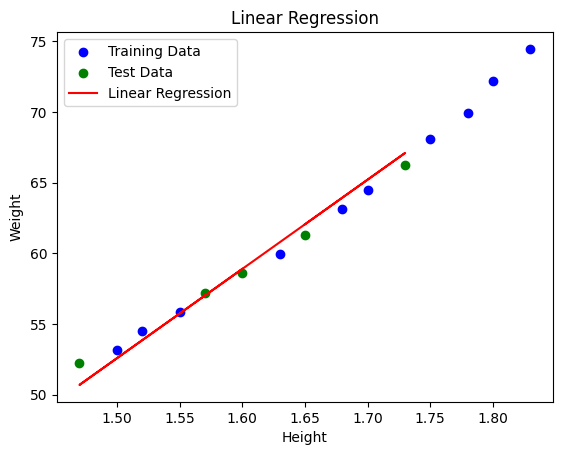

In [2]:
#Experiment No 1
#Linear regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("data_lr.csv")

# Extracting feature and target variables
x = df['Height'].values.reshape(-1, 1)
y = df['Weight'].values.reshape(-1, 1)

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 123)

# Model training
model = LinearRegression()
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error =  {mse:.3f}")

# Plotting
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Linear Regression')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.legend()
plt.show()

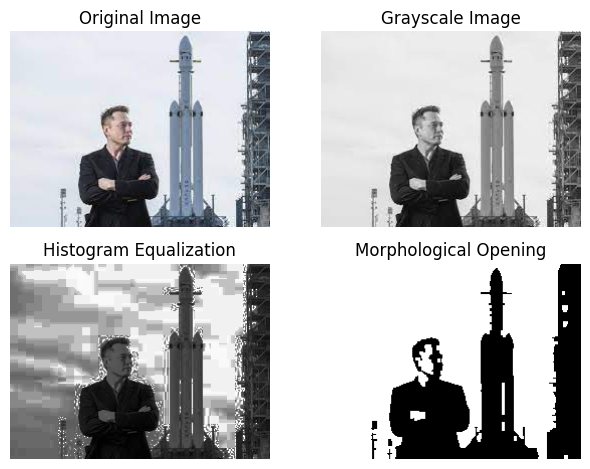

In [3]:
#Experiment No 2
#image enhancement

import cv2 
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread("elon.jpg")

# Convert the image from RGB TO BGR for proper display with matplotlib
img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply histogram equalization
hist = cv2.equalizeHist(gray)

# Apply Otsu's thresholding
binr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Perform morphological opening to remove small noise
kernel = np.ones((3, 3), np.uint8)

opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel, iterations=1)

# Plotting the results


plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Histogram Equalization")
plt.imshow(hist, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Morphological Opening")
plt.imshow(opening, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2749 - loss: 1.9979 - val_accuracy: 0.3814 - val_loss: 1.7205
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3928 - loss: 1.6967 - val_accuracy: 0.4361 - val_loss: 1.5896
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4236 - loss: 1.6102 - val_accuracy: 0.4421 - val_loss: 1.5639
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4465 - loss: 1.5388 - val_accuracy: 0.4415 - val_loss: 1.5659
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4677 - loss: 1.4916 - val_accuracy: 0.4649 - val_loss: 1.4962
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4630 - loss: 1.4936
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2068 - loss: 2.1313 - val_accuracy: 0.3088 - val_loss: 1.8857
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2985 - loss: 1.9082 - val_accuracy: 0.3042 - val_loss: 1.8949
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━

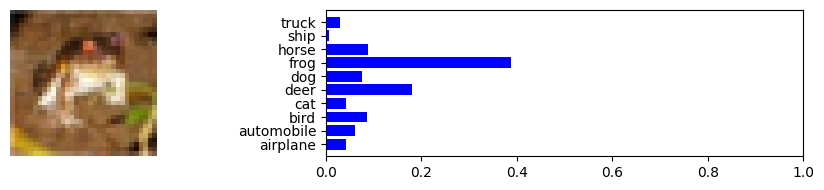

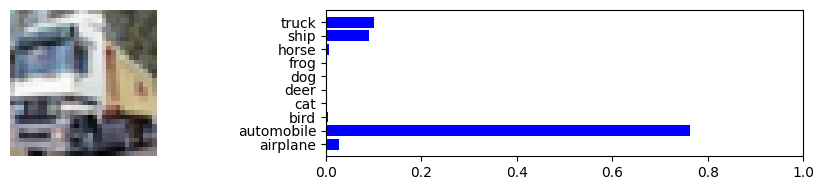

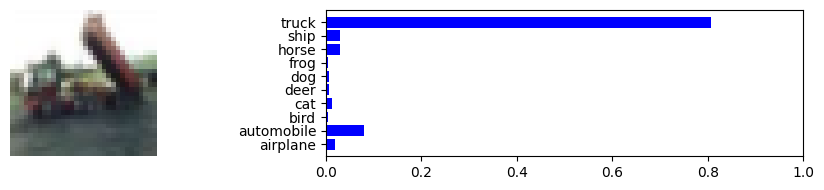

In [6]:
# Experiment No 3
# CIFAR 10 Classification


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

def create_model(hidden_units=None, activation=None): # flatten converts 3D to 1D
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation), # Hidden Layer 1
        Dense(hidden_units[1], activation=activation), # Hidden Layer 2
        Dense(hidden_units[2], activation=activation), # Hidden Layer 3
        Dense(10, activation='softmax')
    ])
    return model

# Define hyperparameters to test
hidden_units_list = [(512, 256, 128), (256, 128, 64), (1024, 512, 256)]
activation_list = ['relu', 'tanh', 'sigmoid']

results_dict = {}
counter = 1

# Loop through combinations of hidden units and activations
for hidden_units in hidden_units_list:
    for activation in activation_list:

        model = create_model(hidden_units=hidden_units, activation=activation)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

        _, test_acc = model.evaluate(x_test, y_test)

        model_info = { # Create a dictionary for the current iteration
            "Hidden units": hidden_units,
            "Activation": activation,
            "Test accuracy": round(test_acc * 100, 4)
        }

        results_dict[counter] = model_info  # Add the current dictionary to the results dictionary

        counter += 1
        
# Print the entire results dictionary
for key, value in results_dict.items():
    print(f"Run {key}:")
    for info_key, info_value in value.items():
        print(f"{info_key}: {info_value}")
    print("- -" * 15)  # Dict prints Separator

print("\n")

# Find the run with the highest test accuracy
max_accuracy_run = max(results_dict, key=lambda k: results_dict[k]["Test accuracy"])
max_accuracy_info = results_dict[max_accuracy_run]

# Print details of the run with the highest test accuracy
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key, info_value in max_accuracy_info.items():
    print(f"{info_key}: {info_value}")        
    
    
num_images = 3
sample_images = x_train[:num_images]
predictions = model.predict(sample_images)

def plot_probability_meter(predictions, image):
    class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    # Plot the image
    axs[0].imshow(image)
    axs[0].axis('off')

    # Plot the probability meter
    axs[1].barh(class_labels, predictions[0], color='blue')
    axs[1].set_xlim([0, 1])
    # axs[1].set_xlabel('Probability')

    plt.tight_layout()
    plt.show()

for i in range(num_images):
    plot_probability_meter(predictions[i:i+1], sample_images[i])    

In [29]:
#Experiment No 4
#CIFAR 10 Testing With Different Hyperparameters

import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.initializers import glorot_uniform,he_normal

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=to_categorical(y_train),to_categorical(y_test)


hidden_units=(256,128,64)



In [54]:
def model_tester(model):
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])
    start=time.time()
    model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))
    end=time.time()
    test_loss,test_accuracy=model.evaluate(x_test,y_test)
    time_taken=end-start
    print(f"\n Test_loss = {test_loss}, Test_Accuracy= {test_accuracy*100:.3f}% , Time taken ={time_taken}seconds")
    
    return (model,test_loss,test_accuracy,time_taken)

In [55]:
#baseline model
base_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(hidden_units[0],activation=activation),
    Dense(hidden_units[1],activation=activation),
    Dense(hidden_units[2],activation=activation),
    Dense(10,activation='softmax'),
    
])
baseline_modelResult=model_tester(base_model)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Accuracy: 0.2361 - loss: 2.0651 - val_Accuracy: 0.3341 - val_loss: 1.8813
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.3156 - loss: 1.8755 - val_Accuracy: 0.3292 - val_loss: 1.8319
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.3437 - loss: 1.8180 - val_Accuracy: 0.3442 - val_loss: 1.8495
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.3567 - loss: 1.7849 - val_Accuracy: 0.3501 - val_loss: 1.7884
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.3625 - loss: 1.7724 - val_Accuracy: 0.3787 - val_loss: 1.7363
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - Accuracy: 0.3841 - loss: 1.7299

 Test_loss = 1.736344337463379, Test_Accuracy= 37.870% , Time taken =15.16745638847351seconds


In [45]:
#xavier model
xavier_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(hidden_units[0],activation=activation,kernel_initializer='glorot_uniform'),
    Dense(hidden_units[1],activation=activation,kernel_initializer='glorot_uniform'),
    Dense(hidden_units[2],activation=activation,kernel_initializer='glorot_uniform'),
    Dense(10,activation='softmax'),
    
])
xavier_modelResult=model_tester(base_model)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Accuracy: 0.4434 - loss: 1.5511 - val_Accuracy: 0.4175 - val_loss: 1.6513
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4438 - loss: 1.5494 - val_Accuracy: 0.4194 - val_loss: 1.6428
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4479 - loss: 1.5440 - val_Accuracy: 0.4073 - val_loss: 1.6433
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4440 - loss: 1.5557 - val_Accuracy: 0.4128 - val_loss: 1.6449
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4400 - loss: 1.5481 - val_Accuracy: 0.4263 - val_loss: 1.6414
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - Accuracy: 0.4356 - loss: 1.6347

 Test_loss = 1.641435980796814, Test_Accuracy= 42.630% , Time taken =15.408865928649902seconds


In [41]:
#he-kaiming
kaiming_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(hidden_units[0],activation=activation,kernel_initializer='he_normal'),
    Dense(hidden_units[1],activation=activation,kernel_initializer='he_normal'),
    Dense(hidden_units[2],activation=activation,kernel_initializer='he_normal'),
    Dense(10,activation='softmax'),
    
])
kaiming_modelResult=model_tester(base_model)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Accuracy: 0.4104 - loss: 1.6370 - val_Accuracy: 0.3973 - val_loss: 1.6643
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4171 - loss: 1.6194 - val_Accuracy: 0.4125 - val_loss: 1.6441
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4156 - loss: 1.6266 - val_Accuracy: 0.3976 - val_loss: 1.6920
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4226 - loss: 1.6119 - val_Accuracy: 0.4080 - val_loss: 1.6578
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4213 - loss: 1.6038 - val_Accuracy: 0.4081 - val_loss: 1.6500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - Accuracy: 0.4107 - loss: 1.6411

 Test_loss = 1.6500388383865356, Test_Accuracy= 40.810% , Time taken =15.71924376487732seconds


In [42]:
#dropout 
dropout_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(hidden_units[0],activation=activation,),Dropout(.2),
    Dense(hidden_units[1],activation=activation),Dropout(.2),
    Dense(hidden_units[2],activation=activation),Dropout(.2),
    Dense(10,activation='softmax'),
    
])
dropout_modelResult=model_tester(base_model)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Accuracy: 0.4213 - loss: 1.6130 - val_Accuracy: 0.4173 - val_loss: 1.6377
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4291 - loss: 1.5945 - val_Accuracy: 0.4159 - val_loss: 1.6330
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4282 - loss: 1.5882 - val_Accuracy: 0.4137 - val_loss: 1.6296
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4228 - loss: 1.6012 - val_Accuracy: 0.3988 - val_loss: 1.6840
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4246 - loss: 1.5909 - val_Accuracy: 0.4154 - val_loss: 1.6311
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - Accuracy: 0.4212 - loss: 1.6218

 Test_loss = 1.6310893297195435, Test_Accuracy= 41.540% , Time taken =15.660152912139893seconds


In [43]:
#l1
l1_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(hidden_units[0],activation=activation,kernel_regularizer=l1(.1)),
    Dense(hidden_units[1],activation=activation,kernel_regularizer=l1(.1)),
    Dense(hidden_units[2],activation=activation,kernel_regularizer=l1(.1)),
    Dense(10,activation='softmax'),
    
])
l1_modelResult=model_tester(base_model)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Accuracy: 0.4323 - loss: 1.5877 - val_Accuracy: 0.4274 - val_loss: 1.6155
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4313 - loss: 1.5731 - val_Accuracy: 0.4172 - val_loss: 1.6395
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.4321 - loss: 1.5733 - val_Accuracy: 0.4219 - val_loss: 1.6393
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4340 - loss: 1.5712 - val_Accuracy: 0.4094 - val_loss: 1.6509
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4355 - loss: 1.5607 - val_Accuracy: 0.4083 - val_loss: 1.6517
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - Accuracy: 0.4048 - loss: 1.6450

 Test_loss = 1.6517339944839478, Test_Accuracy= 40.830% , Time taken =15.395910024642944seconds


In [44]:
#l2
l2_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(hidden_units[0],activation=activation,kernel_regularizer=l2(.1)),
    Dense(hidden_units[1],activation=activation,kernel_regularizer=l2(.1)),
    Dense(hidden_units[2],activation=activation,kernel_regularizer=l2(.1)),
    Dense(10,activation='softmax'),
    
])
l2_modelResult=model_tester(base_model)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Accuracy: 0.4339 - loss: 1.5680 - val_Accuracy: 0.4070 - val_loss: 1.6377
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4399 - loss: 1.5565 - val_Accuracy: 0.4055 - val_loss: 1.6545
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4412 - loss: 1.5482 - val_Accuracy: 0.4239 - val_loss: 1.6109
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4397 - loss: 1.5565 - val_Accuracy: 0.4106 - val_loss: 1.6339
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.4413 - loss: 1.5471 - val_Accuracy: 0.4196 - val_loss: 1.6489
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - Accuracy: 0.4167 - loss: 1.6430

 Test_loss = 1.6489499807357788, Test_Accuracy= 41.960% , Time taken =15.44814133644104seconds


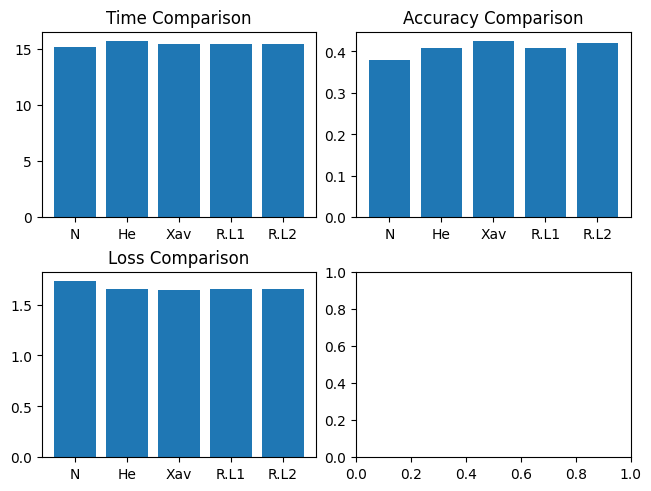

In [62]:
x_name = ["Normal", "He_Normal", "Xavier", "Regularizer_L1", "Regularizer_L2"]
x = ["N", "He", "Xav", "R.L1", "R.L2"]

getY = lambda x: [
    baseline_modelResult[x], 
    kaiming_modelResult[x], 
    xavier_modelResult[x], 
    l1_modelResult[x], 
    l2_modelResult[x]
]

y_time = getY(3)
y_accuracy = getY(2)
y_loss = getY(1)

fig, ax  = plt.subplots(2, 2, layout="constrained")

ax_time = ax[0][0]
ax_acc = ax[0][1]
ax_loss = ax[1][0]

ax_time.bar(x, y_time)
ax_acc.bar(x, y_accuracy)
ax_loss.bar(x, y_loss)

ax_time.title.set_text('Time Comparison')
ax_acc.title.set_text('Accuracy Comparison')
ax_loss.title.set_text('Loss Comparison')

plt.show()


In [9]:
# Experiment no 5
# mnist classification Using CNN
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=to_categorical(y_train),to_categorical(y_test)

In [10]:
 model = Sequential([
        Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(64 ,3, activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Accuracy =", round(test_acc * 100, 4))
print("Loss =", round(test_loss * 100,4))


Epoch 1/5


C:\Users\eapen\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8736 - loss: 0.4258 - val_accuracy: 0.9836 - val_loss: 0.0439
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9851 - val_loss: 0.0460
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accuracy: 0.9872 - val_loss: 0.0373
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.9899 - val_loss: 0.0308
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9900 - val_loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0399
Accuracy = 99.0
Loss = 3.1997


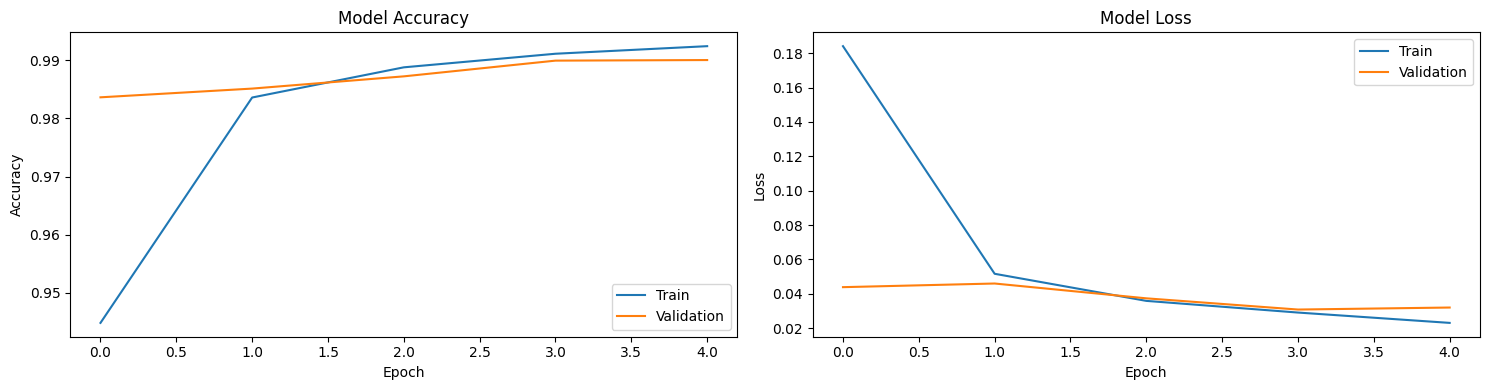

In [11]:
import matplotlib.pyplot as plt
# Create subplots: 1 row, 2 columns
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 4))

# Plot accuracy
plt1.plot(history.history['accuracy'])
plt1.plot(history.history['val_accuracy'])
plt1.set_title('Model Accuracy')
plt1.set_ylabel('Accuracy')  # Fixed typo here
plt1.set_xlabel('Epoch')
plt1.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt2.plot(history.history['loss'])
plt2.plot(history.history['val_loss'])
plt2.set_title('Model Loss')
plt2.set_ylabel('Loss')
plt2.set_xlabel('Epoch')
plt2.legend(['Train', 'Validation'], loc='upper right')

# Show the plots
plt.tight_layout()  # Ensures the plots don't overlap
plt.show()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 83ms/step - accuracy: 0.8422 - loss: 0.1007 - val_accuracy: 0.9601 - val_loss: 0.0264
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 162s 86ms/step - accuracy: 0.9583 - loss: 0.0273 - val_accuracy: 0.9680 - val_loss: 0.0206
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9673 - loss: 0.0210 - val_accuracy: 0.9705 - val_loss: 0.0187
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 168s 90ms/step - accuracy: 0.9701 - loss: 0.0185 - val_accuracy: 0.9669 - val_loss: 0.0209
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 95ms/step - accuracy: 0.9745 - loss: 0.0165 - val_accuracy: 0.9753 - val_loss: 0.0167


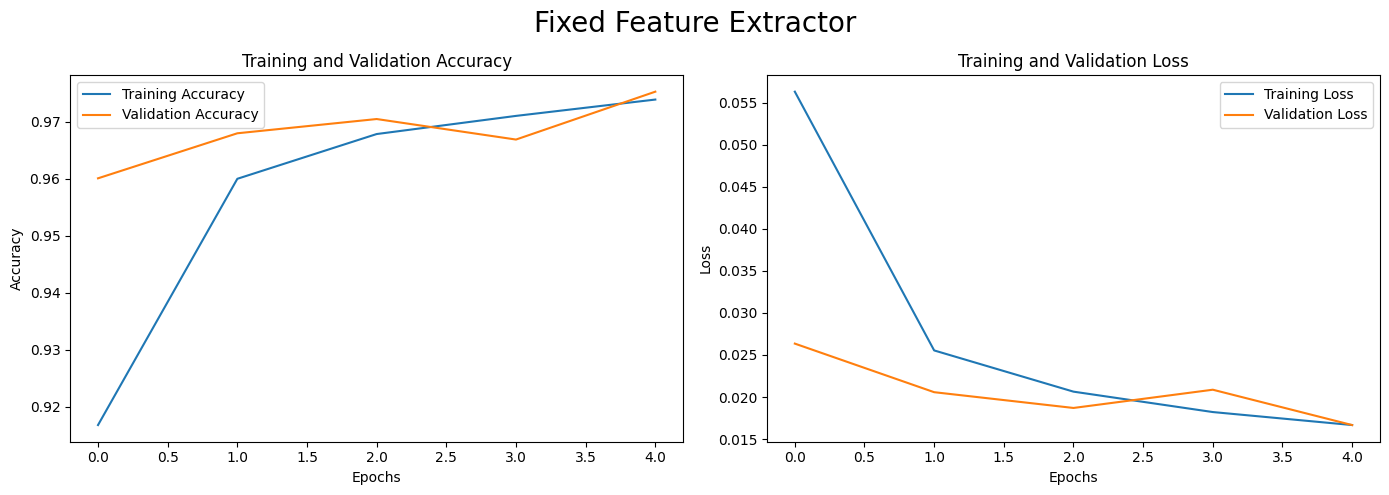

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 406s 216ms/step - accuracy: 0.9069 - loss: 0.0535 - val_accuracy: 0.9786 - val_loss: 0.0137
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83545s 45s/step - accuracy: 0.9784 - loss: 0.0148 - val_accuracy: 0.9746 - val_loss: 0.0166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 425s 227ms/step - accuracy: 0.9809 - loss: 0.0134 - val_accuracy: 0.9798 - val_loss: 0.0149
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 428s 228ms/step - accuracy: 0.9847 - loss: 0.0101 - val_accuracy: 0.9819 - val_loss: 0.0120
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 432s 230ms/step - accuracy: 0.9866 - loss: 0.0092 - val_accuracy: 0.9850 - val_loss: 0.0112
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9829 - loss: 0.0131


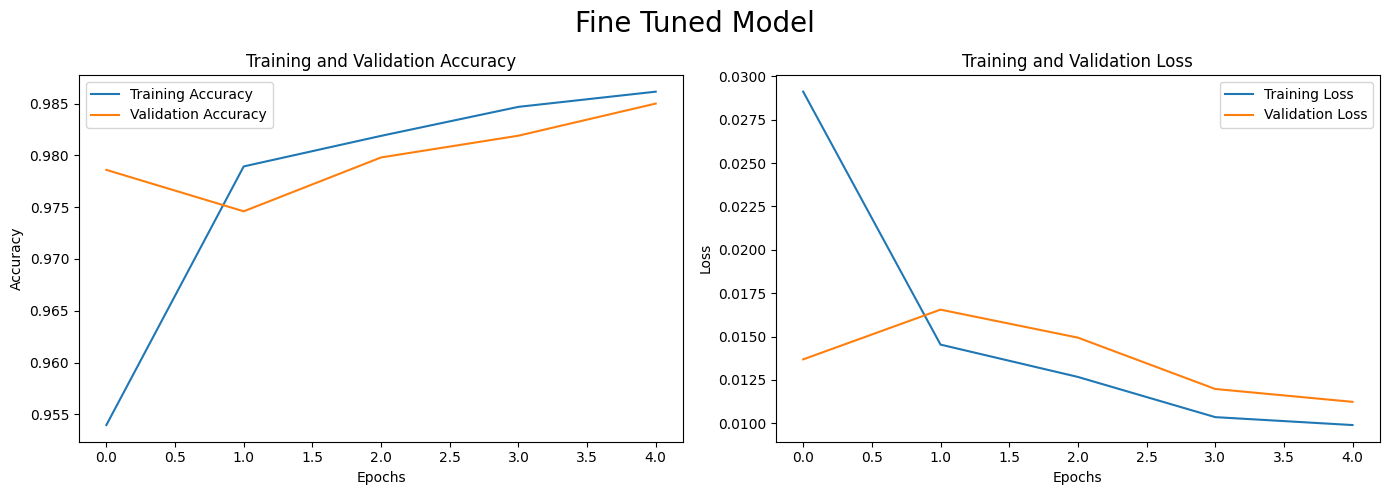

In [12]:
#Experiment No 6
# mnist classification using VGG19

import numpy as np
from tensorflow.image import resize
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = np.expand_dims(xtrain, -1)
xtest = np.expand_dims(xtest, -1)
xtrain = np.repeat(xtrain, 3, axis=-1)
xtest = np.repeat(xtest, 3, axis=-1)
xtrain = resize(xtrain, (32,32))
xtest = resize(xtest, (32,32))
xtrain, xtest = xtrain / 255.0, xtest / 255.0
ytrain, ytest = to_categorical(ytrain), to_categorical(ytest)

vgg = VGG19(weights='imagenet',input_shape=(32,32,3), include_top=False)
for layer in vgg.layers:
    layer.trainable = False

layer_2 = Flatten()(vgg.output)
layer_3 = Dense(512, activation='relu')(layer_2)
output = Dense(10, activation='sigmoid')(layer_3)

model = Model(inputs=vgg.input, outputs = output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(xtrain, ytrain, batch_size=32, epochs=5, validation_data=(xtest, ytest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
plt.tight_layout()
fig.suptitle('Fixed Feature Extractor', fontsize=20)
fig.subplots_adjust(top=0.85)
plt.show()

vgg = VGG19(weights='imagenet',input_shape=(32,32,3), include_top=False)

for layer in vgg.layers:
    layer.trainable = False

for layer in vgg.layers[-4:]:
    layer.trainable = True
    
layer_2 = Flatten()(vgg.output)
layer_3 = Dense(512, activation='relu')(layer_2)
output = Dense(10, activation='softmax')(layer_3)
model = Model(inputs=vgg.input, outputs = output)
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model = Model(inputs=vgg.input, outputs = output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(xtrain, ytrain, batch_size=32, epochs=5, validation_data=(xtest, ytest))
loss, accuracy = model.evaluate(xtest, ytest)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
plt.tight_layout()
fig.suptitle('Fine Tuned Model', fontsize=20)
fig.subplots_adjust(top=0.85)
plt.show()

Epoch 1/70


C:\Users\eapen\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0156
Epoch 2/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0132e-05
Epoch 3/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2600e-05
Epoch 4/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6834e-05
Epoch 5/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5132e-05
Epoch 6/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9217e-05
Epoch 7/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2545e-05
Epoch 8/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5741e-05
Epoch 9/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8547e-05
Epoch 10/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0002e-05
Epoch 11/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3841e-05
Epoch 12/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9788e-05
Epoch 13/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3784e-05
Epoch 14/70
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5619e-05
Epoch 15/70
148/

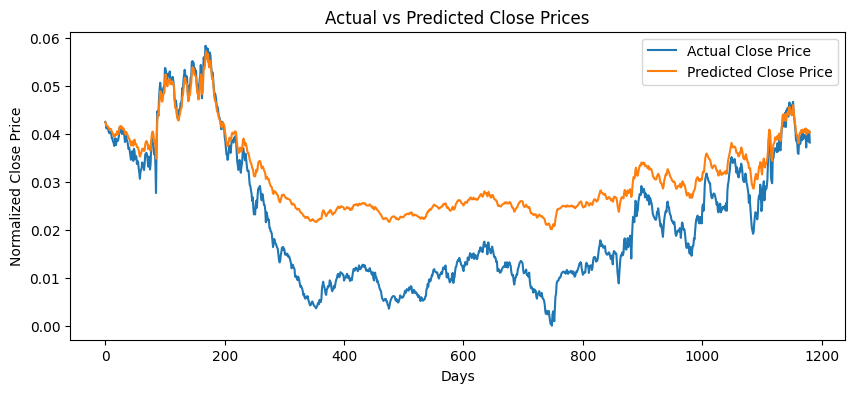

In [2]:
#Experiment No 7
#time series forecasting for nifty 50 dataset using LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("data.csv")
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

look_back=10
def create_lagged_features(df, look_back):
    X, y = [], []
    for i in range(len(df) - look_back):
        X.append(df[['Open', 'High', 'Low', 'Close']].iloc[i:i + look_back].values)
        y.append(df['Close'].iloc[i + look_back])
    return np.array(X), np.array(y)

X, y = create_lagged_features(df, look_back)

# Step 3: Split the data into training and testing sets (keeping the order)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build the LSTM model
model = tf.keras.Sequential([
    LSTM(64, input_shape=(look_back, 4)),  # LSTM layer to handle 3D input
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Step 5: Train the model
model.fit(X_train, y_train, epochs=70, verbose=1)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute Error: {mae:.4f}")

# Step 8: Visualize the results
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Days')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

In [3]:
#Experiment No 8,9
# imdb dataset review classification using LSTM,GRU,SimpleRNN

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,GRU,Dense,SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words=10000
max_length=200

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=num_words)
x_train=pad_sequences(x_train,maxlen=max_length)
x_test=pad_sequences(x_test,maxlen=max_length)

#  SimpleRNN 
SimpleRNN_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    SimpleRNN(64),  
    Dense(1, activation='sigmoid') 
])

#LSTM
LSTM_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# GRU model
GRU_Model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    GRU(64),
    Dense(1, activation='sigmoid')
])

models = {
    'SimpleRNN': SimpleRNN_model,
    'LSTM':LSTM_model ,
    'GRU': GRU_Model
}

results = []  
    
text_sequence = np.reshape(x_test[0], (1, -1))

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Make a prediction
    prediction = model.predict(text_sequence)
    prediction_label = 'Positive' if prediction > 0.5 else 'Negative'

    # Store the results for the current model
    results.append({
        'Model': model_name,
        'Loss': loss,
        'Accuracy': accuracy,
        'Prediction': prediction_label
    })
import pandas as pd
# Convert results to DataFrame for tabular view
results_df = pd.DataFrame(results)
print("\nResults:\n", results_df)

    

C:\Users\eapen\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training SimpleRNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Training LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Training GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

Results:
        Model      Loss  Accuracy Prediction
0  SimpleRNN  0.542187   0.80504   Negative
1       LSTM  0.428776   0.85460   Negative
2        GRU  0.480481   0.85396   Negative


In [1]:
#Experiment No 10
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

# Load and preprocess the dataset
data = pd.read_csv('English_Hindi_Clean_New.csv', encoding='utf-8')
all_eng_words = set()
all_hin_words = set()

for eng, hin in zip(data['English'], data['Hindi']):
    all_eng_words.update(eng.split())
    all_hin_words.update(hin.split())

data['len_eng_sen'] = data['English'].apply(lambda x: len(x.split()))
data['len_hin_sen'] = data['Hindi'].apply(lambda x: len(x.split()))
data = data[(data['len_eng_sen'] <= 20) & (data['len_hin_sen'] <= 20)]

max_len_src = max(data['len_hin_sen'])
max_len_tar = max(data['len_eng_sen'])
inp_words = sorted(list(all_eng_words))
tar_words = sorted(list(all_hin_words))
num_enc_toks = len(all_eng_words)
num_dec_toks = len(all_hin_words) + 1  # plus 1 for zero padding

inp_tok_idx = {word: i + 1 for i, word in enumerate(inp_words)}
tar_tok_idx = {word: i + 1 for i, word in enumerate(tar_words)}
rev_inp_char_idx = {i: word for word, i in inp_tok_idx.items()}
rev_tar_char_idx = {i: word for word, i in tar_tok_idx.items()}

X, y = data['English'], data['Hindi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
batch_size = 128

# Generator function with explicit shape and dtype for TensorFlow Dataset
def generate_batch_data(X, y, batch_size):
    while True:
        enc_inp_data = np.zeros((batch_size, max_len_src), dtype='float32')
        dec_inp_data = np.zeros((batch_size, max_len_tar), dtype='float32')
        dec_tar_data = np.zeros((batch_size, max_len_tar, num_dec_toks), dtype='float32')
        
        for i, (inp_text, tar_text) in enumerate(zip(X, y)):
            if i >= batch_size:
                break
            for t, word in enumerate(inp_text.split()):
                enc_inp_data[i, t] = inp_tok_idx.get(word, 0)
            for t, word in enumerate(tar_text.split()):
                if t < len(tar_text.split()) - 1:
                    dec_inp_data[i, t] = tar_tok_idx.get(word, 0)
                if t > 0:
                    dec_tar_data[i, t - 1, tar_tok_idx.get(word, 0)] = 1.0
        yield (enc_inp_data, dec_inp_data), dec_tar_data

# Use tf.data.Dataset.from_generator with explicit output signature
def create_dataset(X, y, batch_size):
    return tf.data.Dataset.from_generator(
        lambda: generate_batch_data(X, y, batch_size),
        output_signature=(
            (
                tf.TensorSpec(shape=(batch_size, max_len_src), dtype=tf.float32),
                tf.TensorSpec(shape=(batch_size, max_len_tar), dtype=tf.float32),
            ),
            tf.TensorSpec(shape=(batch_size, max_len_tar, num_dec_toks), dtype=tf.float32),
        )
    )

# Create train and validation datasets
train_dataset = create_dataset(X_train, y_train, batch_size).repeat()
val_dataset = create_dataset(X_test, y_test, batch_size).repeat()

# Model architecture
latent_dim = 250
enc_inps = Input(shape=(None,))
enc_emb = Embedding(num_enc_toks, latent_dim, mask_zero=True)(enc_inps)
enc_lstm = LSTM(latent_dim, return_state=True)
enc_outputs, st_h, st_c = enc_lstm(enc_emb)
enc_states = [st_h, st_c]

# Decoder setup
dec_inps = Input(shape=(None,))
dec_emb_layer = Embedding(num_dec_toks, latent_dim, mask_zero=True)
dec_emb = dec_emb_layer(dec_inps)
dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
dec_outputs, _, _ = dec_lstm(dec_emb, initial_state=enc_states)
dec_dense = Dense(num_dec_toks, activation='softmax')
dec_outputs = dec_dense(dec_outputs)

# Define and compile the model
model = Model([enc_inps, dec_inps], dec_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
train_samples = len(X_train)
val_samples = len(X_test)
model.fit(
    train_dataset,
    steps_per_epoch=train_samples // batch_size,
    epochs=5,
    validation_data=val_dataset,
    validation_steps=val_samples // batch_size
)

# Define encoder model for inference
enc_model = Model(enc_inps, enc_states)

# Define decoder model for inference
dec_st_inp_h = Input(shape=(latent_dim,))
dec_st_inp_c = Input(shape=(latent_dim,))
dec_states_inps = [dec_st_inp_h, dec_st_inp_c]
dec_emb2 = dec_emb_layer(dec_inps)
dec_outputs2, st_h2, st_c2 = dec_lstm(dec_emb2, initial_state=dec_states_inps)
dec_states2 = [st_h2, st_c2]
dec_outputs2 = dec_dense(dec_outputs2)
dec_model = Model([dec_inps] + dec_states_inps, [dec_outputs2] + dec_states2)

# Function to translate an English sentence to Hindi
def translate(inp_seq):
    states_value = enc_model.predict(inp_seq)
    tar_seq = np.zeros((1, 1))
    tar_seq[0, 0] = tar_tok_idx['START_']
    stop_cond = False
    dec_sen = ''

    while not stop_cond:
        output_toks, h, c = dec_model.predict([tar_seq] + states_value)
        sampled_tok_idx = np.argmax(output_toks[0, -1, :])
        sampled_char = rev_tar_char_idx[sampled_tok_idx]
        dec_sen += ' ' + sampled_char

        if sampled_char == '_END' or len(dec_sen) > 50:
            stop_cond = True

        tar_seq = np.zeros((1, 1))
        tar_seq[0, 0] = sampled_tok_idx
        states_value = [h, c]

    return dec_sen

# Testing with an example
train_gen = generate_batch_data(X_train, y_train, batch_size=1)
(inp_seq, actual_output), _ = next(train_gen)
hin_sen = translate(inp_seq)
print(f'''Input English sentence: {X_train.iloc[0]}\n
          Predicted Hindi Translation: {hin_sen}\n
          Actual Hindi Translation: {y_train.iloc[0]}''')


Epoch 1/5


C:\Users\eapen\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_6']. Received: the structure of inputs=('*', '*')
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 382ms/step - loss: 7.0926 - val_loss: 8.8625
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - loss: 4.6426 - val_loss: 9.0548
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 377ms/step - loss: 3.4637 - val_loss: 9.6506
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 374ms/step - loss: 1.6457 - val_loss: 10.4354
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 375ms/step - loss: 0.5247 - val_loss: 10.9509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\eapen\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_6', 'keras_tensor_13', 'keras_tensor_14']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Input English sentence: which is a pity but in india every other sport

          Predicted Hindi Translation:  जिसपे हमें तरस आती है लेकिन भारत में हर खेल _END

          Actual Hindi Translation: START_ जिसपे हमें तरस आती है लेकिन भारत में हर खेल _END
